In [1]:
%load_ext sql

In [2]:
%sql sqlite:///C:/sqlite/chinook2.db

# 1) Introduction

Think about the SQL queries you'll be writing to answer the following questions.

* How to use the result of another query in a given query? (e.g., calculate the number of sales in a country out of the total number of sales)

* How to filter the rows that are in a list based on a condition? (e.g., find the sales of customers that are companies)

* How to aggregate an already aggregated table? (e.g., average highest sales per country)

If you have struggled with these questions, you're at the right place. To answer them, we need a new SQL tool: subqueries. **A subquery is a query nested inside another query**. As a data practitioner, subqueries are really useful to scale and to make more powerful queries.

We'll explore **three** types of subqueries in this course, how to use them, and why they are so valuable. These different types of subqueries are classified based on what they return: 

* a scalar subquery;

* multi-rows subquery;

* or a multi-columns subquery

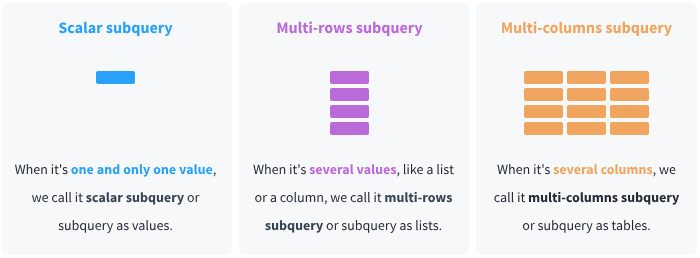

We'll continue to use the **Chinook** database which contains information about a fictional digital music shop — like an iTunes store. Here is its schema.

![alt text](chinook_schema.svg)

Let's write our first subquery by computing the percentage of sales made in each country (i.e., number of sales per country over the total number of sales). The only way to do this properly is to use a subquery. Let's give it a shot!

In [3]:
%%sql
SELECT billing_country, 
       ROUND(COUNT(*)*100.0/
             (SELECT COUNT(*) 
                FROM invoice), 2)  AS sales_prop
  FROM invoice
 GROUP BY billing_country
 ORDER BY sales_prop DESC
 LIMIT 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


billing_country,sales_prop
USA,21.34
Canada,12.38
Brazil,9.93
France,8.14
Germany,6.68


# 2) Subquery Example

On the previous exercise, we wanted to compute the percentage of sales made in each country (i.e., number of sales per country over the total number of sales), and we wrote the following query.

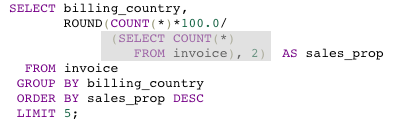

The highlighted part of the query is new and very confusing. To understand what we did, let's go step by step.

First, let's compute the number of sales per country from the invoice table using the `COUNT(*)` aggregate function.

In [4]:
%%sql
SELECT billing_country, COUNT(*)  AS row_tally
  FROM invoice
 GROUP BY billing_country
 ORDER BY row_tally DESC
 LIMIT 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


billing_country,row_tally
USA,131
Canada,76
Brazil,61
France,50
Germany,41


Now, we need the **total number of sales**. We can get this number by counting the total rows in the `invoice` table with the following query.

The result is `614`, a single value. We can thereby calculate that more than 21% `(131 * 100.0 / 614)` of sales are made in the United States. We can now write a query to compute these proportions by dividing the sales in each country by the total number of sales.


In [5]:
%%sql
SELECT COUNT(*) 
  FROM invoice;

 * sqlite:///C:/sqlite/chinook2.db
Done.


COUNT(*)
614


 We can now write a query to compute these proportions by dividing the **sales in each country** by the **total number of sales**.

In [6]:
%%sql
SELECT billing_country, 
       ROUND(COUNT(*) * 100.0 / 614, 2)  AS sales_prop
  FROM invoice
 GROUP BY billing_country
 ORDER BY sales_prop DESC
 LIMIT 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


billing_country,sales_prop
USA,21.34
Canada,12.38
Brazil,9.93
France,8.14
Germany,6.68


In the last query, we use `614` that is the result of another query. We can replace this number with the query that computes it inside the main query. To do so, we have to enclose the inner query in parentheses `()`. This is how we do subqueries.

Here's the final query with subquery

```sql
SELECT billing_country, 
       ROUND(COUNT(*)*100.0/
             (SELECT COUNT(*) 
                FROM invoice), 2)  AS sales_prop
  FROM invoice
 GROUP BY billing_country
 ORDER BY sales_prop DESC
 LIMIT 5;
```

## Instructions

Write a query to compute the top five customers based on their percentage of sales (i.e., number of sales per `customer_id` over the total number of sales) using a subquery.

 1. First, compute the number of sales per `customer_id` using the first query below.
 


In [8]:
%%sql
SELECT customer_id, COUNT(*) AS row_tally
  FROM invoice
 GROUP BY customer_id
 limit 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


customer_id,row_tally
1,13
2,11
3,9
4,9
5,18


2. Second, compute the total number of sales using the second query below.

In [10]:
%%sql
SELECT COUNT(*) 
  FROM invoice;

 * sqlite:///C:/sqlite/chinook2.db
Done.


COUNT(*)
614


 3. Third, write a query combining the previous queries to compute the number of sales per `customer_id` times `100.0` over the total number of sales.

       * Round down the result to the nearest hundredth.

       * Enclose the second query in parentheses `()` when you use it.

In [11]:
%%sql
SELECT customer_id, 
       ROUND(COUNT(*)*100.0/
             (SELECT COUNT(*)
                FROM invoice),2) as sales_prop
  FROM invoice
 GROUP BY customer_id
 limit 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


customer_id,sales_prop
1,2.12
2,1.79
3,1.47
4,1.47
5,2.93


# 3) Subqueries Vocabulary

In the previous screen, we explored the concept of subqueries, where a query can be nested inside another. The query inside (nested) is commonly referred to as a **subquery** or **inner query**, and the one containing the subquery is known as the **outer query**.

In SQL execution order, the **inner query is executed first**, and its result is then used in the execution of the outer query. Despite this nesting, the overall execution order within both the inner and outer queries follows the standard SQL query execution order.

The overarching goal of this exercise is to calculate the **sales proportion for each country based on the provided invoice table**. The step-by-step instructions guide you through the process of using subqueries to achieve this goal.

## Instructions

1. Write a query that computes the overall purchase amount using the `SUM(total)` function from the `invoice` table.

    * Test your query in the code editor.
    
    * This query will be used as a subquery in the next step.

1. Write a query that computes the share of sales of each country.

    * Use the `invoice` table.
    
    * Select the `billing_country` column.
    
    * Use the `SUM(total)` aggregate function to compute the total purchase amount for each country.
    
    * Divide this result by the overall purchase amount (the subquery from step 1).
    
    * Rename the resulting column as `country_share`.
    
    * Group the results using the `GROUP BY` clause on the `billing_country` column.
    
    * Order the results by the `country_share` column in descending order.
    
    * Limit the results to the first five rows.
    
The final result is a single query.

In [12]:
%%sql
/*SELECT SUM(total) AS
  FROM invoice --- inner query
*/

SELECT billing_country, 
       SUM(total)/(
           SELECT SUM(total)
           FROM invoice) AS country_share
  FROM invoice
GROUP BY billing_country
ORDER BY country_share DESC
LIMIT 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


billing_country,country_share
USA,0.22093756569266343
Canada,0.11372713895312171
Brazil,0.0908135379440824
France,0.08261509354635274
Germany,0.07105318478032373


# 4) Subqueries Guidelines

There are some guidelines to consider when using subqueries. The most important one is to **ALWAYS** enclose subqueries in parentheses. This is the only way SQL knows it's a subquery.

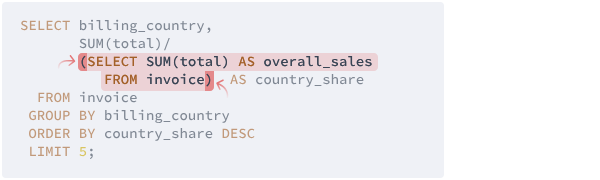

Beyond that, we should arrange subqueries using the same style as any other query and align it to the *right side of the river*.

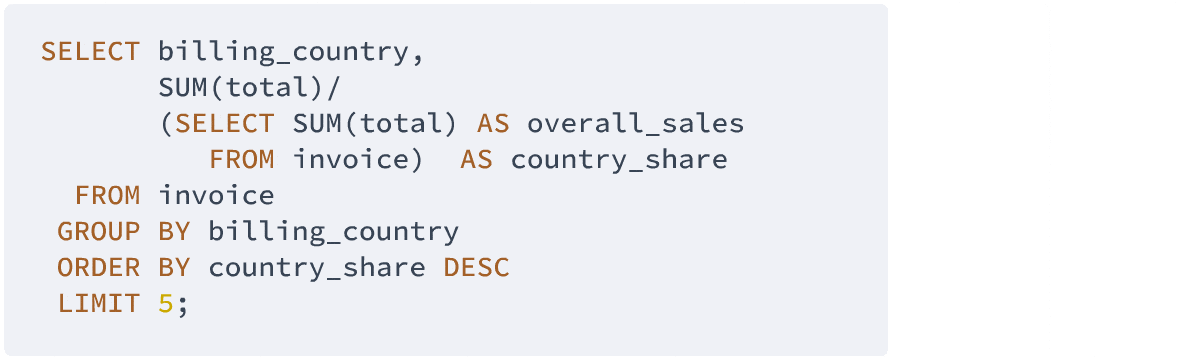

# 5) Filtering with Scalar Subqueries

Scalar subqueries always return **one and only one value**. Therefore, we can use them anywhere we can use values in a query.

We can use them to calculate percentages of total, like we did before.

```sql
SELECT billing_country, 
       SUM(total)/
       (SELECT SUM(total) AS overall_sales
          FROM invoice)  AS country_share
  FROM invoice
 GROUP BY billing_country
 ORDER BY country_share DESC
 LIMIT 5;
 ```

 We can also use them to do filtering in WHERE and HAVING clauses. The query counts the rows where the **total purchase amount is greater than the average.**

 ```sql
SELECT COUNT(*) AS rows_tally
  FROM invoice
 WHERE total > (SELECT AVG(total)
                  FROM invoice);
```


## Instructions

1. Write a query that determines the highest total purchase amount from the `invoice` table using the `MAX(total)` aggregate function. Multiply this amount by `0.75`.

1. Write a query that filters the rows of the `invoice` table where the total purchase amount is greater than 75% of the highest total purchase amount.

    * Use the query from the first step as a subquery.

The final result is a single query that includes a subquery.

In [13]:
%%sql
/*SELECT MAX(total) * 0.75
  FROM invoice --75% do MAX
*/

SELECT COUNT(*) as '75% MAX'
  FROM invoice
 WHERE total > 
       (SELECT MAX(total) * 0.75
          FROM invoice)

 * sqlite:///C:/sqlite/chinook2.db
Done.


75% MAX
6


# 6) Filtering Aggregate Results with Scalar Subqueries

As a reminder, to filter the aggregate results in SQL, we use the `HAVING` clause instead of the `WHERE` clause. For example, if we want to calculate the **total purchase** amount for **each customer** where this amount is **greater than or equal to 100 dollars**, we'll write the following query:

In [14]:
%%sql
SELECT customer_id, SUM(total) AS customer_total
  FROM invoice
 GROUP BY customer_id
HAVING SUM(total) >= 100;

 * sqlite:///C:/sqlite/chinook2.db
Done.


customer_id,customer_total
1,108.89999999999999
5,144.54
6,128.7
13,106.92
34,102.96
46,114.84
58,111.87


We can see in this table that customer 5 has the highest total purchase amount. 

**But which customer has the highest average cost per purchase?**

To answer this question, we have to use subqueries. We'll need to compute customer 5's purchase amount average first and then compare this value to the other customer purchase amount averages.

## Instructions

1. Write a query to compute customer 5's average purchase amount using the `AVG(total)` aggregate function from the `invoice` table.

1. Write a query to compute the customer purchase amount averages.

    * Use the `invoice` table.
    
    * Select the `customer_id` column.
    
    * Compute the `AVG(total)` and rename it `customer_avg`.
    
    * Group rows by `customer_id`.
    
    * Use the `HAVING` clause to filter the result where `AVG(total)` is greater than the customer 5's purchase amount average using the query of the previous instruction as a subquery.
    
The final result is a single query that includes a subquery.

In [17]:
%%sql
/*
SELECT AVG(total)
  FROM invoice
 WHERE customer_id = 5 -- Calcula a média por compra do cliente 5
*/

SELECT customer_id, AVG(total) as customer_avg
  FROM invoice
 GROUP BY customer_id
 HAVING AVG(total) >
        (SELECT AVG(total)
           FROM invoice
          WHERE customer_id = 5)
limit 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


customer_id,customer_avg
1,8.376923076923076
3,11.11
6,10.725
8,8.627142857142857
16,9.28125
